In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.io

%matplotlib inline

**Load Data**

In [27]:
data = scipy.io.loadmat('/content/sample_data/mnist_small.mat')
X = data['X']
Y = data['Y']

Y.shape

(10000, 1)

**Expectation step**


In [0]:
def Expectation(mu, pk, var2, X):
  [N, D] = X.shape
  K=10
  for n in range(N):
    for k in range(K):
      #compute the log of numerator of posterior
      z[n][k] = np.log(pk[k]) - (np.linalg.norm(X[n] - mu[k])**2/(2*var2))

    maxZ = np.max(z[n])
    z[n] = np.exp(z[n] - maxZ - np.log(np.sum(np.exp(z[n] - maxZ)))) 

  return z     

**Maximization step**

In [0]:
def Maximisation(mu, pk, var2, X, z):
 [N, D] = X.shape
 K=10 
 nk = np.sum(z, axis=0)
 # re-estimate pk
 pk = nk/N
        
 # re-estimate the variance
 mu = z.T@X 
 mu = np.array([mu[k]/nk[k] for k in range(K)])

 # re-estimate the variance
 var2 = np.sum(z@np.square(X - mu))/(N*D)

 return mu, pk, z, var2

**Implementation**

761.4063451512259


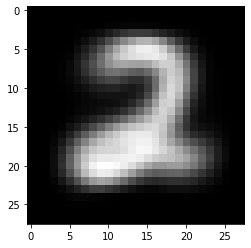

761.9967532850932


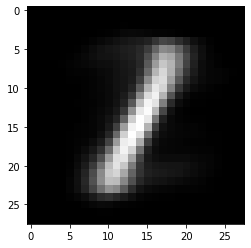

709.6665943653521


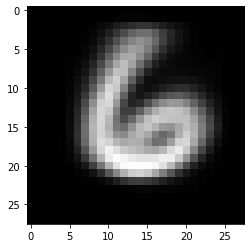

889.6191621402455


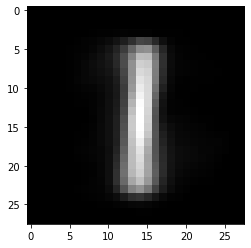

1488.0964964359766


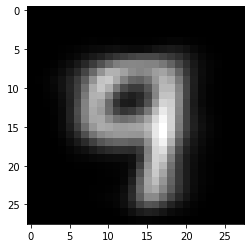

790.8609586216633


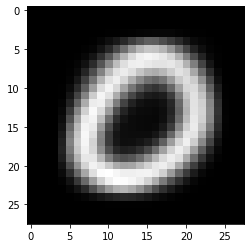

1219.6243993631056


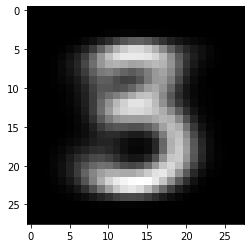

1456.591517810134


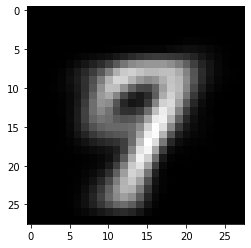

997.9455312346121


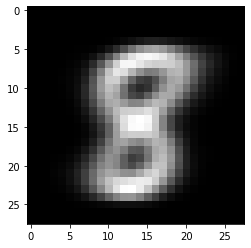

924.1922415925895


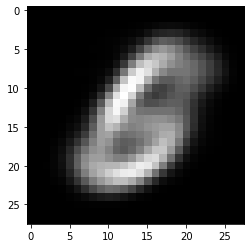

In [45]:
    [N, D] = X.shape
    K = 10
    numIter = 200 
    
    var2 = 1 
    
    pk = np.ones(K) / K 
    
    mu = np.random.rand(K, D) 
    z = np.zeros((N, K))

    for iteration in range(numIter):
      z = Expectation(mu, pk, var2, X)
      mu, pk, z, var2 = Maximisation(mu, pk, var2, X, z)
      
    nk = np.sum(z, axis=0)

    for i in range(K):
        plt.imshow(mu[i].reshape((28, 28)), cmap='gray')
        print(nk[i])
        plt.show()


array([1684.64030286,  791.87698289, 1615.20638342,  444.05764931,
        434.46535668, 1256.71136136, 1237.84064945,  862.82704985,
       1309.34040893,  363.03385523])